In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress minor warnings for cleaner output
warnings.filterwarnings('ignore')

In [12]:
mydata = pd.read_csv("../assets_csv/Food_Nutrition_Dataset.csv")

mydata

,food_name,category,calories,protein,carbs,fat,iron,vitamin_c
0,"Apple, candied",Apples,134.0,1.34,29.61,2.15,0.12,3.6
1,"Apple, raw",Apples,61.0,0.17,14.80,0.15,0.03,4.6
2,"Apple, dried",Dried fruits,243.0,0.93,65.89,0.32,1.40,3.9
3,"Crisp, apple",Cakes and pies,215.0,2.81,30.18,9.59,1.00,0.6
4,"Apple, baked",Apples,113.0,0.32,22.70,3.08,0.19,3.9
...,...,...,...,...,...,...,...,...
200,"Garlic bread, with parmesan cheese, from fast ...",Yeast breads,351.0,8.76,41.06,16.80,2.99,0.2
201,"Garlic bread, with melted cheese, from fast fo...",Yeast breads,339.0,11.41,34.21,17.34,2.48,0.2
202,"Fast foods, breadstick, soft, prepared with ga...",Fast Foods,1430.0,12.20,44.50,12.90,4.65,0.0
203,"HORMEL ALWAYS TENDER, Pork Loin Filets, Lemon ...",Pork Products,492.0,17.80,1.79,4.16,0.60,1.7


<b>Question:</b>
<style> h1 {text-align: left;color: yellow;} </style>
<h1>Which food item listed has the highest calorie content ?</h1>

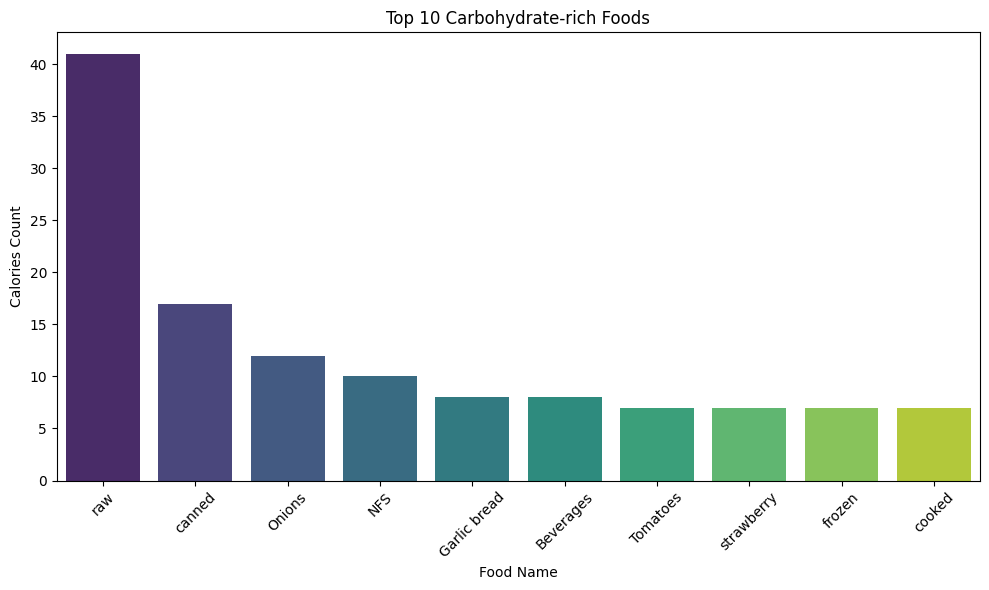

In [15]:
data_nut = mydata['food_name'].dropna().str.split(',').explode().str.strip()

top_carbs = data_nut.value_counts().head(10).reset_index()
top_carbs.columns = ['food_name', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(data=top_carbs, x='food_name', y='Count', palette='viridis')
plt.title('Top 10 Carbohydrate-rich Foods')
plt.xlabel('Food Name')
plt.ylabel('Calories Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<p><b>Insights:</b><br>
Based on the visualization, this shows that "raw" food has the highest "Calories Count" at over 40, which is more than double the count of the next highest item, "canned" food, which is below 20.</p><br>

<b>Question:</b>
<style> h1 {text-align: left;color: yellow;} </style>
<h1> Which foods have the highest vitamin C content?</h1>

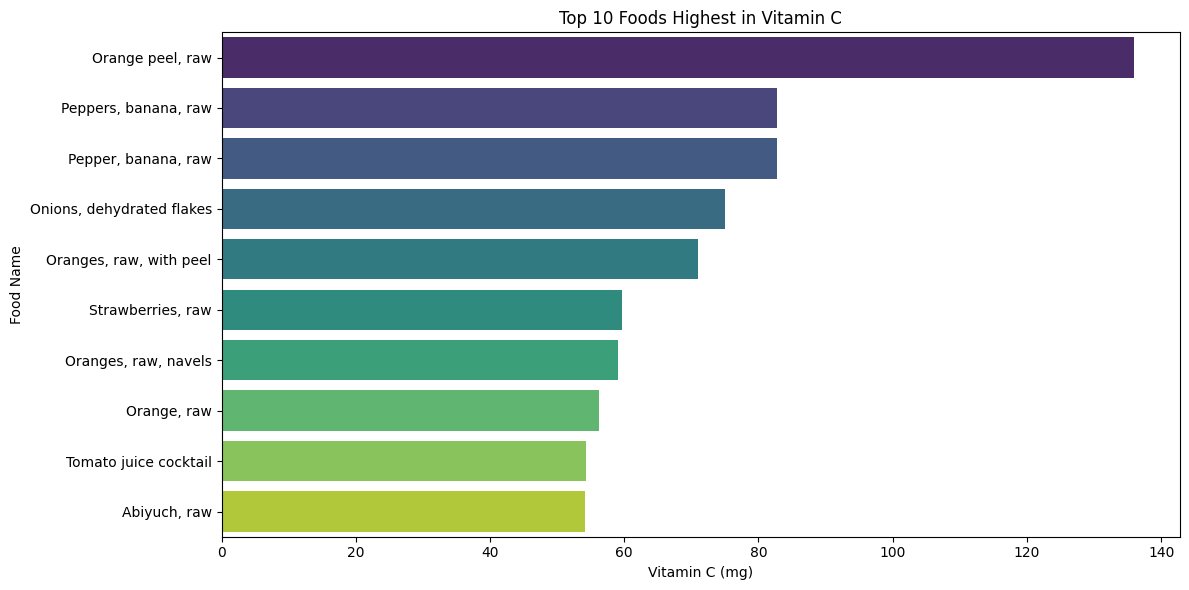

In [16]:
# Sort foods by vitamin C content (descending) and take top 10
top_vitamin_c = mydata[['food_name', 'vitamin_c']] \
                    .dropna() \
                    .sort_values(by='vitamin_c', ascending=False) \
                    .head(10)

plt.figure(figsize=(12, 6))

# Horizontal bar chart
sns.barplot(
    data=top_vitamin_c,
    y='food_name',
    x='vitamin_c',
    palette='viridis'
)

plt.title('Top 10 Foods Highest in Vitamin C')
plt.xlabel('Vitamin C (mg)')
plt.ylabel('Food Name')
plt.tight_layout()
plt.show()


<p><b>Insights:</b><br>
Based on this visualization, it shows that "Orange peel, raw" is the food item with the highest Vitamin C content, registering over 130 mg, which is significantly more than any other food on the list.</p><br>

<b>Question:</b>
<style> h1 {text-align: left;color: yellow;} </style>
<h1> How does iron content vary across the 15 most common food categories? </h1>

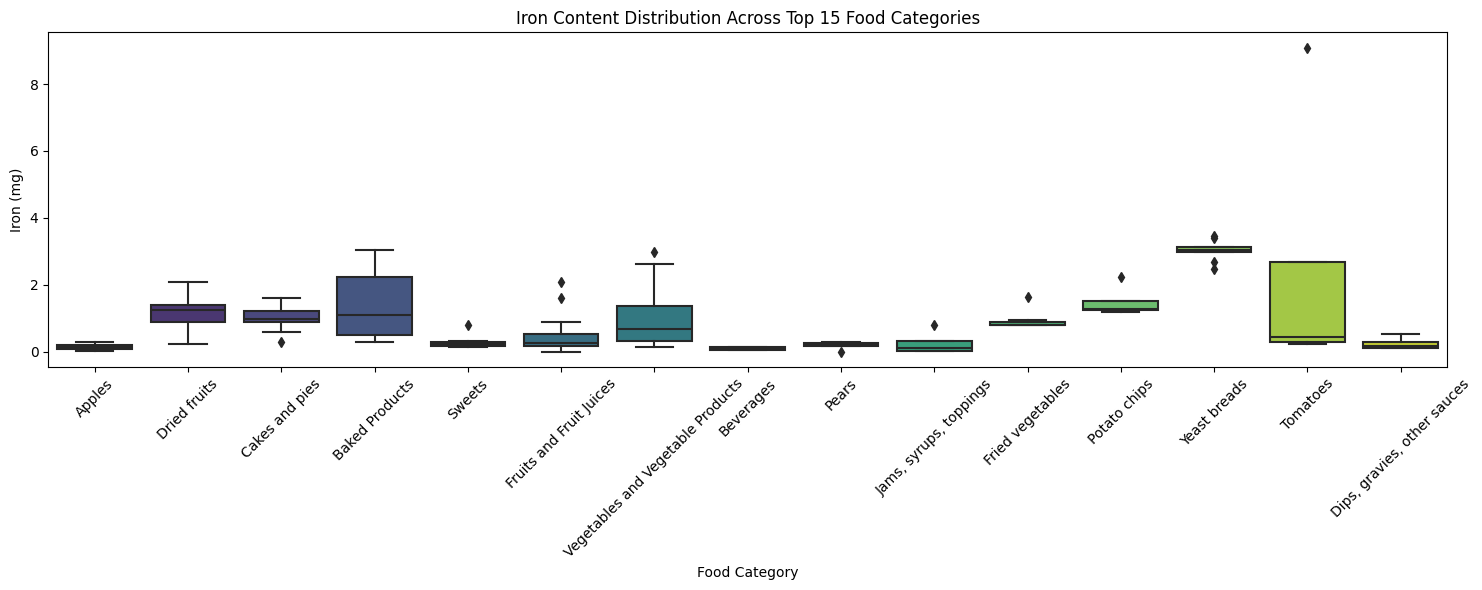

In [ ]:
category_counts = mydata['category'].value_counts().head(15).index

# Filter dataset to keep only the top 15 categories
iron_data_15 = mydata[mydata['category'].isin(category_counts)][['category', 'iron']].dropna()

plt.figure(figsize=(15, 6))
sns.boxplot(data=iron_data_15, x='category', y='iron', palette='viridis')

plt.title('Iron Content Distribution Across Top 15 Food Categories')
plt.xlabel('Food Category')
plt.ylabel('Iron (mg)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<p><b>Insights:</b><br>
Based on this visualization, it shows that Baked Products have the highest median Iron Content (indicated by the line inside the box), with a median value of approximately 2.5 mg. However, the Tomatoes category shows the highest spread of Iron Content, with outliers extending to over 8 mg, suggesting greater variability in iron content within that food group. </p><br>

<b>Question:</b>
<style> h1 {text-align: left;color: yellow;} </style>
<h1> Is there a pattern linking high-carb foods to high calories?</h1>

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Use sns.regplot for a quick scatter plot with a linear regression line (trendline)
sns.regplot(
    x='carbs', 
    y='calories', 
    data=mydata, 
    scatter_kws={'alpha':0.8, 's':100}, 
    line_kws={'color':'red', 'linestyle':'--'} 
)

plt.title('Carbohydrates vs. Calories: Correlation Analysis', fontsize=16)
plt.xlabel('Carbohydrates (grams)', fontsize=14)
plt.ylabel('Calories (kCal)', fontsize=14)
plt.grid(True, linestyle=':', alpha=0.6)
plt.tight_layout()
plt.show()

# Calculate the actual correlation coefficient
correlation = mydata['carbs'].corr(mydata['calories'])
# print(f"Pearson Correlation Coefficient (R): {correlation:.2f}")